# FE542 Midterm

1.(50 points) Solve problems 2.1 and 2.2 on page 104 of the textbook (Tsay's Financial Time Series 3rd edition).

2.(100 points) For this problem download data for any equity you like. Please download data a.s.a.p. after you see this. Choose an equity that has a history of at least 20 years. Download daily data for the equity. A great concern for time series estimation is that one needs a large number of observations from the time series for a reliable estimation and forecast. On the other hand the data has to be stationary for a reliable estimation and in general it is believed that data stays stationary for only short periods of time. Here we will study the performance of various models and the effect of the data length on the estimation. To do this create new data vectors. Data 1 contains the last 6 months of the equity return. Data 2 contains the last 12 months. Data 3 the last 24 months. Data 4 the last 30 months. Data 5 the last 60 months. Data 6 the last 120 months and finally Data 7 the last 240 months. 

Repeat each of the following for all the data sets.

(a) Work with continuously compounded returns. Pay attention to the proper date order in the data you downloaded.

(b) Study unit root non-stationarity. Compare for all data periods.

(c) Build the best AR, the best MA and the best ARMA model after you remove non-stationarity (if needed) for each time period.

(d) Build a seasonal model for your data using whatever lag you feel approximates the data best.

(e) Using each of the models that you constructed forecast the next five observations. Pay attention to the holidays (i.e., you can't forecast Saturdays and Sundays return). You should have 4 models for each dataset. Do the best models in each category (AR, MA, etc.) depend to a particular time period length?

(f) 5 working days after the date you downloaded your equity data, go ahead and download the same equity data again. Test the performance of each model by comparing the forecasted returns (and prices) with the real observations collected after 5 working days. Calculate the squared error of your forecast for each model and the absolute value of your forecast. What was the better model? Alternately you could set aside the last 5 days of your data nad only use those for the evaluation of the forecast.

(g) Was there a difference in the time periods (i.e., is there a type of model that consistently outperformed the others for all the datasets under consideration)?

(h) Are the perceived differences between models due to chance or there is a model that performed significantly better? (Hint: Use the standard error of the forecast as given by the R output.)

>Preprocessing

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm

/home/jerryxyx/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import datetime
def preprocess_wrds_data(df):
    df['date'] = df['caldt'].apply(lambda x: datetime.datetime.strptime(str(x),"%Y%m%d"))
    df.index = df.date
    df.drop(['date'],axis=1,inplace=True)
    df['simple_return'] = (df.totval-df.totval.shift(1))/df.totval.shift(1)
    df['log_return'] = np.log(df.totval/df.totval.shift(1))
    df.dropna(axis=0,how='any',inplace=True)

In [3]:
df = pd.read_csv('SP500_20y.csv')
print(df.head())
preprocess_wrds_data(df)
print(df.head())

      caldt    vwretd        totval
0  19970102 -0.005223  5.523625e+09
1  19970103  0.014891  5.605739e+09
2  19970106 -0.000903  5.600588e+09
3  19970107  0.007834  5.640232e+09
4  19970108 -0.005812  5.605930e+09
               caldt    vwretd        totval  simple_return  log_return
date                                                                   
1997-01-03  19970103  0.014891  5.605739e+09       0.014866    0.014757
1997-01-06  19970106 -0.000903  5.600588e+09      -0.000919   -0.000919
1997-01-07  19970107  0.007834  5.640232e+09       0.007079    0.007054
1997-01-08  19970108 -0.005812  5.605930e+09      -0.006082   -0.006100
1997-01-09  19970109  0.008604  5.654034e+09       0.008581    0.008544


In [4]:
mask_6m = (df.index>=datetime.datetime(2017,6,1)) & (df.index<=datetime.datetime(2017,12,31))

In [5]:
mask_12m = (df.index>=datetime.datetime(2017,1,1)) & (df.index<=datetime.datetime(2017,12,31))

In [6]:
mask_24m = (df.index>=datetime.datetime(2016,1,1)) & (df.index<=datetime.datetime(2017,12,31))

In [7]:
mask_30m = (df.index>=datetime.datetime(2015,6,1)) & (df.index<=datetime.datetime(2017,12,31))

In [8]:
mask_60m = (df.index>=datetime.datetime(2014,1,1)) & (df.index<=datetime.datetime(2017,12,31))

In [9]:
mask_120m = (df.index>=datetime.datetime(2007,1,1)) & (df.index<=datetime.datetime(2017,12,31))

In [10]:
mask_240m = (df.index>=datetime.datetime(1997,1,1)) & (df.index<=datetime.datetime(2017,12,31))

In [11]:
data = []
data.append(df.loc[mask_6m]['log_return'])
data.append(df.loc[mask_12m]['log_return'])
data.append(df.loc[mask_24m]['log_return'])
data.append(df.loc[mask_30m]['log_return'])
data.append(df.loc[mask_60m]['log_return'])
data.append(df.loc[mask_120m]['log_return'])
data.append(df.loc[mask_240m]['log_return'])

> Ploting Data

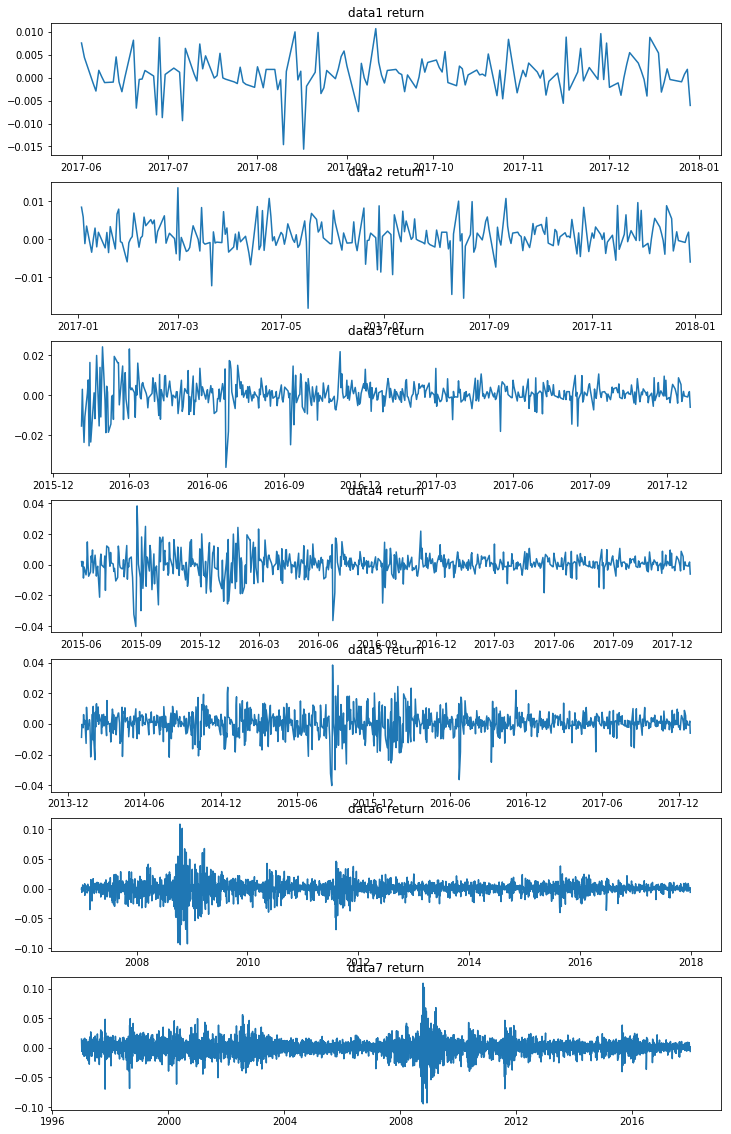

In [12]:
fig = plt.figure(figsize=(12,20))

plt.subplot(7,1,1)
plt.plot(data[0])
plt.title("data1 return")

plt.subplot(7,1,2)
plt.plot(data[1])
plt.title("data2 return")

plt.subplot(7,1,3)
plt.plot(data[2])
plt.title("data3 return")

plt.subplot(7,1,4)
plt.plot(data[3])
plt.title("data4 return")

plt.subplot(7,1,5)
plt.plot(data[4])
plt.title("data5 return")

plt.subplot(7,1,6)
plt.plot(data[5])
plt.title("data6 return")

plt.subplot(7,1,7)
plt.plot(data[6])
plt.title("data7 return")

plt.show()

> Unit-root checking

In [13]:
from statsmodels.tsa.stattools import adfuller

def unit_root_cheking(time_series,regression):  
    # perform Dickey-Fuller test
    dftest = adfuller(time_series,regression='c',autolag="BIC")
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value',
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [14]:
for i in range(7):
    print("data",i+1)
    unit_root_cheking(data[i],'c')

data 1
Test Statistic                -1.402746e+01
p-value                        3.482619e-26
#Lags Used                     0.000000e+00
Number of Observations Used    1.470000e+02
Critical Value (1%)           -3.475637e+00
Critical Value (5%)           -2.881410e+00
Critical Value (10%)          -2.577365e+00
dtype: float64
data 2
Test Statistic                -1.783958e+01
p-value                        3.110032e-30
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64
data 3
Test Statistic                 -25.137521
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    502.000000
Critical Value (1%)             -3.443444
Critical Value (5%)             -2.867315
Critical Value (10%)            -2.569846
dtype: float64
data 4
Test Statistic   

> ACF and PACF

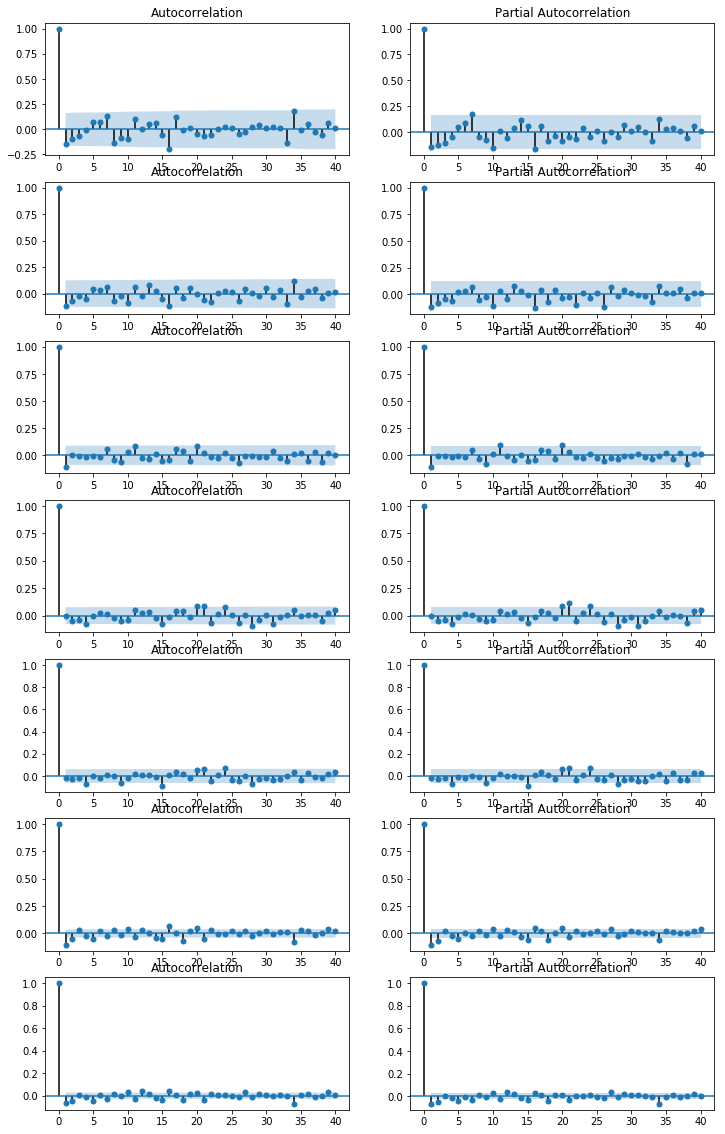

In [15]:
plt.figure(figsize=(12,20))
for i in range(7):
    ax1 = plt.subplot(7,2,2*i+1)
    sm.graphics.tsa.plot_acf(data[i], alpha=0.05, lags=40, ax=ax1)
    ax2 = plt.subplot(7,2,2*i+2)
    sm.graphics.tsa.plot_pacf(data[i], alpha=0.05, lags=40, ax=ax2)
    
plt.show()

In [16]:
model=sm.tsa.ARMA(data[0],(3,0)).fit(trend='nc')

/home/jerryxyx/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/jerryxyx/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [17]:
model.bic

/home/jerryxyx/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


-1187.298525642082

In [18]:
np.zeros((7,2,2))

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

In [19]:
_[1,1,1]

0.0

> Model screening

In [20]:
bic_matrix = np.zeros((7,3,3))
for i in range(7):
    for j in range(3):
        for k in range(3):
            try:
                model=sm.tsa.ARMA(data[i],(j,k)).fit(trend='nc')
                bic_matrix[i,j,k] = model.bic
            except:
                pass
            
print(bic_matrix)

/home/jerryxyx/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/jerryxyx/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


[[[     0.          -1195.95676528  -1191.88525948]
  [ -1195.45523082  -1191.63031386      0.        ]
  [ -1191.69399417  -1187.00773655  -1192.90627544]]

 [[     0.          -2018.79598461  -2013.78835145]
  [ -2018.54326816  -2013.6584138   -2013.49984449]
  [ -2013.75981276  -2008.26235357  -2007.97533821]]

 [[     0.          -3617.15622817  -3611.00922006]
  [ -3617.23481946  -3611.01610856  -3604.79692256]
  [ -3611.01600987  -3604.79584951  -3599.73269413]]

 [[     0.          -4472.79466762  -4468.30583713]
  [ -4472.79382481      0.              0.        ]
  [ -4467.99277056  -4464.28196923      0.        ]]

 [[     0.          -6943.46739256  -6937.50512071]
  [ -6943.44873246      0.              0.        ]
  [ -6937.33546925  -6934.16623411  -6927.77656789]]

 [[     0.         -16386.7923173  -16385.92987103]
  [-16383.04200341 -16384.38197837 -16379.43062207]
  [-16386.91285109 -16380.16602192      0.        ]]

 [[     0.         -31673.50131615 -31676.16004454]


In [21]:
np.argmin(bic_matrix[0][0])

1

In [22]:
np.argmin(bic_matrix[0])
bic_matrix[0]

array([[    0.        , -1195.95676528, -1191.88525948],
       [-1195.45523082, -1191.63031386,     0.        ],
       [-1191.69399417, -1187.00773655, -1192.90627544]])

In [23]:
a=_
a.reshape(9)

array([    0.        , -1195.95676528, -1191.88525948, -1195.45523082,
       -1191.63031386,     0.        , -1191.69399417, -1187.00773655,
       -1192.90627544])

In [24]:
def find_min_idx(a):
    p = np.argmin(a)
    return (p//a.shape[1],p%a.shape[1])

def model_screening(bic_matrix):
    ar_model = []
    ma_model = []
    arma_model = []
    ndata = bic_matrix.shape[0]
    for i in range(ndata):
        best_ar_order = np.argmin(bic_matrix[i][:][0])
        ar_model.append(sm.tsa.ARMA(data[i],(best_ar_order,0)).fit(trend='nc'))
        best_ma_order = np.argmin(bic_matrix[i][0][:])
        ma_model.append(sm.tsa.ARMA(data[i],(0,best_ma_order)).fit(trend='nc'))
        best_arma_order = find_min_idx(bic_matrix[i])
        arma_model.append(sm.tsa.ARMA(data[i],best_arma_order).fit(trend='nc'))
    return (ar_model,ma_model,arma_model)

In [25]:
(ar_model,ma_model,arma_model) = model_screening(bic_matrix)

/home/jerryxyx/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/jerryxyx/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [26]:
for i in range(7):
    print("*******************************************************")
    print("*******************************************************")
    print("The best ARMA model of data", i+1)
    print(arma_model[i].params)
    print("The best AR model of data", i+1)
    print(ar_model[i].params)
    print("The best MA model of data", i+1)
    print(ma_model[i].params)

*******************************************************
*******************************************************
The best ARMA model of data 1
ma.L1.log_return   -0.153207
dtype: float64
The best AR model of data 1
ar.L1.log_return   -0.124573
dtype: float64
The best MA model of data 1
ma.L1.log_return   -0.153207
dtype: float64
*******************************************************
*******************************************************
The best ARMA model of data 2
ma.L1.log_return   -0.10621
dtype: float64
The best AR model of data 2
ar.L1.log_return   -0.095425
dtype: float64
The best MA model of data 2
ma.L1.log_return   -0.10621
dtype: float64
*******************************************************
*******************************************************
The best ARMA model of data 3
ar.L1.log_return   -0.106124
dtype: float64
The best AR model of data 3
ar.L1.log_return   -0.106124
dtype: float64
The best MA model of data 3
ma.L1.log_return   -0.104704
dtype: float64
************

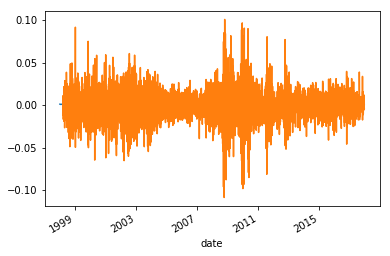

In [27]:
data[6].rolling(252).mean().plot()
(data[6]- data[6].shift(300)).plot()
plt.show()

# FE542 Midterm

# FE542 Midterm

# FE542 Midterm

# FE542 Midterm